<a href="https://colab.research.google.com/github/subhra-15/Introduction-to-Machine-Learning/blob/master/Data%20Exploration%20and%20Preprocessing/4_Data_Exploration_of_independent_Categorical_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dataset
from google.colab import files
  
  
uploaded = files.upload()

Saving Transformed_Housing_Data[1] to Transformed_Housing_Data[1]


In [20]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['Transformed_Housing_Data[1]']))
df

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,8,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21605,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,8,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21606,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,7,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21607,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,8,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


In [21]:
#To eyeball a categorical variable
df['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [22]:
#Finding different values of the house
df['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

from the above result we can comment that these are ordinal categorical variable
as Excellent>Good>Fair>Okay>Bad

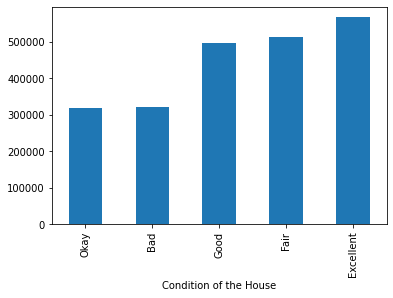

In [23]:
#Visual Represent

df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

# **ANOVA**


*   It stands for ANalysis Of VAriable
*   It checks if the mean i.e the average value of the target variable across different level or unique value of categorical variable are equal or not


---


**Hypothesis**



1.   Null Hypothesis:- there is no difference in the means
2.   Alternate Hypothesis:- Atleast one of the mean is different

There are two value that can be obtained from ANOVA:-
1. F Value: the larger value
2. p Value : Value<0.05

---
There are two types of Anova:
1. One way ANOVA: it deals with one independent variable only
2. Two Way ANOVA: It deals with two or more independent variables


---


There is a simple modification that we need to do in variable name otherwise python will give error
In python the variable name should not have space between them
for e.g: Sale Price should be Sale_Price






In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
df=df.rename(columns={'Sale Price': 'Sale_Price'})
df=df.rename(columns={'Condition of the House': 'Condition_of_the_House'})
df=df.rename(columns={'Ever Renovated': 'Ever_Renovated'})
df=df.rename(columns={'Waterfront View': 'Waterfront_View'})
df.head(10)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,10,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,No,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,7,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,No,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,7,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,No,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,7,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,No,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,7,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,No,0


In [26]:
mod= ols('Sale_Price~ Condition_of_the_House',data=df).fit()

In [27]:
Anova_Table=sm.stats.anova_lm(mod,type=2)
print(Anova_Table)

                             df        sum_sq  ...         F        PR(>F)
Condition_of_the_House      4.0  1.441831e+13  ...  58.25563  5.447605e-49
Residual                21604.0  1.336752e+15  ...       NaN           NaN

[2 rows x 5 columns]


by above result we reject null hypothesis and accept alternate hypothesis

**ANOVA can only find if a variable has an impact on other or not.It cannot find how strong and weak the impact is**

# **Binning and Creation of Dummy variables**

# **Creation of Dummy Variables**

It is a process of transforming a categorical variable into a set of numerical or boolean variable called dummy variable each of which have value 0 or 1

The number of dummy variable created from the categorical variable depends on the number of unique value that categorical variable have
for example: categorical variable 'Condition_of_the_House' have 5 unique value so there will be 5 dummy variables to represent it


---
**Why we need dummy variables? Why create so many variables when the same information can be represented by the categorical variable**

1.   Regression model require all the independent variable to be numerical in nature.
2.   By creating dummy variables we are transforming categorical variable to numerical variables
3.   After creating Dummy variable we can drop the categorical variable




In [28]:
import pandas as pd

#converting the condition of the house from categorical to numerical variable
df=pd.get_dummies(df,columns=['Condition_of_the_House'],drop_first=True)
df.head(10)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,10,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,No,0,0,1,0,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,7,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,No,0,0,1,0,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,7,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,No,0,0,1,0,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,7,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,No,0,0,1,0,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,7,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,No,0,0,1,0,0


In [29]:
# converting two categorical variable simultaneously to numreical variable(basically applying dummy variables)

df=pd.get_dummies(df,columns=['Ever_Renovated','Waterfront_View'],drop_first=True)
df.head(10)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,0,10,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,0,0,1,0,0,0,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,0,7,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,0,0,1,0,0,0,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,0,7,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,0,0,1,0,0,0,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,0,7,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,0,0,1,0,0,0,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,0,7,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,0,0,1,0,0,0,0


# **Binning**

It is also a variable transformation technique

If the number of level of a categorical variable is large(say>20) then binning these level into fewer groups before creating dummy variable

In [30]:
Zip_Table=df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [31]:
Zip_Table['Zipcode_Group']=pd.cut(Zip_Table['Sale_Price'],
                                  bins=10,
                                  labels=['ZipCode_Group_0',
                                          'ZipCode_Group_1',
                                          'ZipCode_Group_2',
                                          'ZipCode_Group_3',
                                          'ZipCode_Group_4',
                                          'ZipCode_Group_5',
                                          'ZipCode_Group_6',
                                          'ZipCode_Group_7',
                                          'ZipCode_Group_8',
                                          'ZipCode_Group_9'],
                                          include_lowest=True)
Zip_Table=Zip_Table.drop(columns='Sale_Price')


In [32]:
#merging the two table into df
df=pd.merge(df,Zip_Table,
            left_on='Zipcode',
            how='left',
            right_index=True)


In [33]:
# Droping the ZipCode column in df
df=df.drop(columns='Zipcode')
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,ZipCode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,ZipCode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,ZipCode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,ZipCode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,ZipCode_Group_4


In [34]:
#creating Dummy variables for Zipcode_Group
df= pd.get_dummies(df,columns=['Zipcode_Group'],drop_first=True)
df.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_ZipCode_Group_1,Zipcode_Group_ZipCode_Group_2,Zipcode_Group_ZipCode_Group_3,Zipcode_Group_ZipCode_Group_4,Zipcode_Group_ZipCode_Group_5,Zipcode_Group_ZipCode_Group_6,Zipcode_Group_ZipCode_Group_7,Zipcode_Group_ZipCode_Group_8,Zipcode_Group_ZipCode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
